In [7]:
# STEP 1: Upload CSV File
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

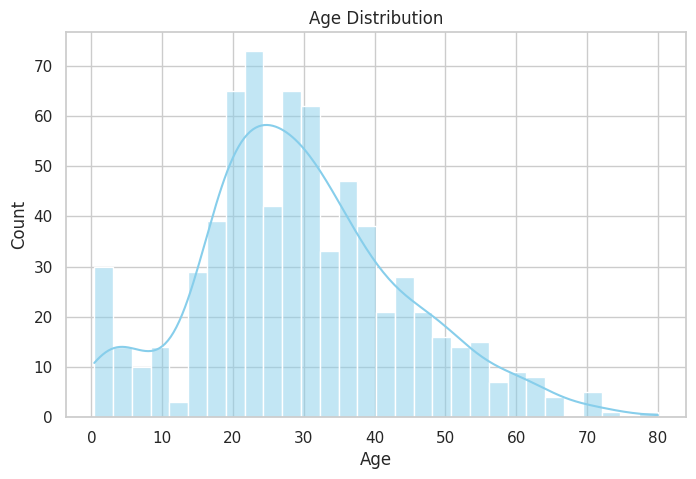

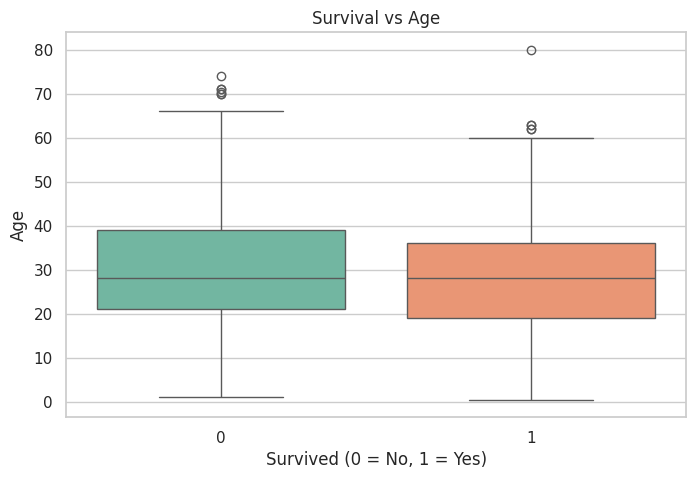

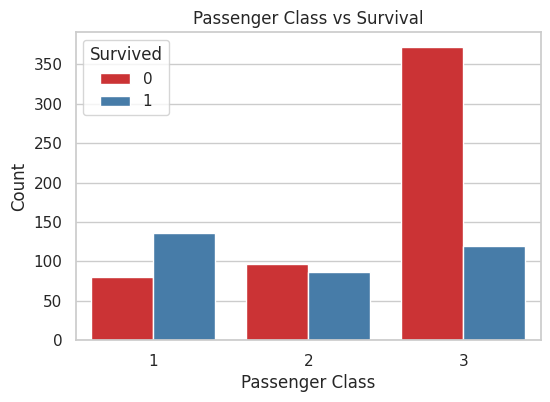

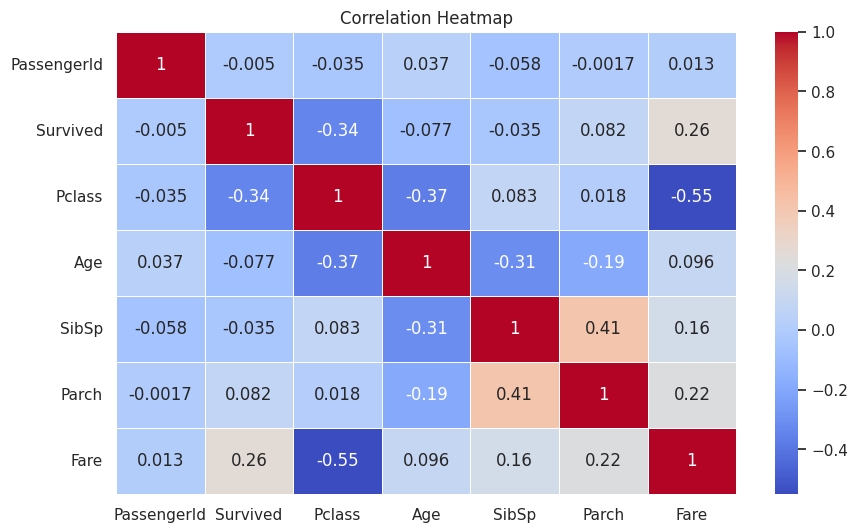

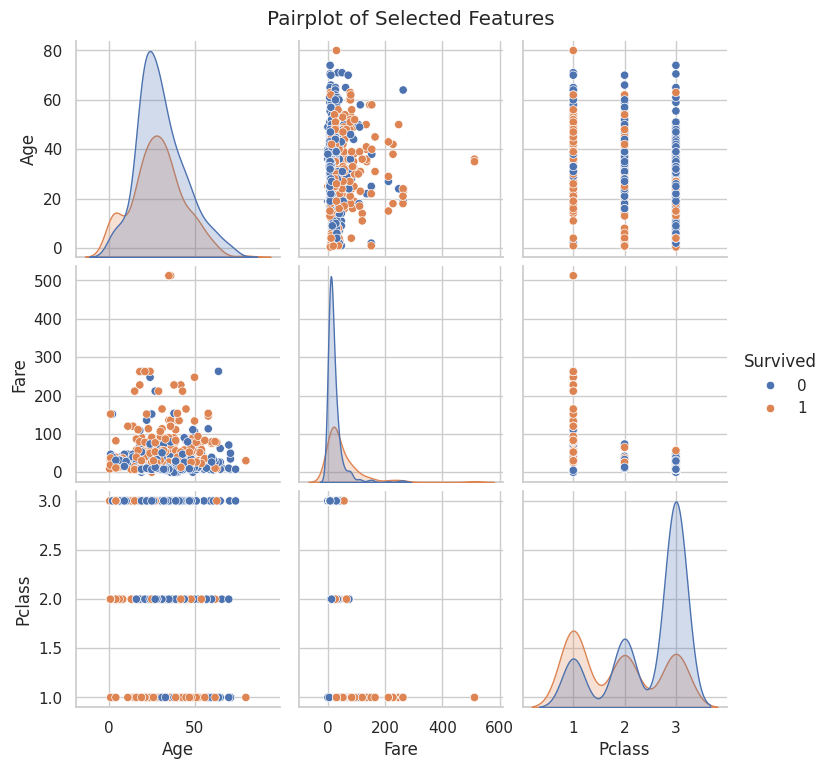

In [9]:

import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Basic Info
print("First 5 rows:\n", df.head())
print("\n Shape:", df.shape)
print("\n Data Types & Null Values:\n")
df.info()
print("\n Missing Values:\n", df.isnull().sum())
print("\n Descriptive Stats:\n", df.describe())

# Set plot style
sns.set(style="whitegrid")

# 1. Histogram - Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Boxplot - Age vs Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df, palette="Set2")
plt.title('Survival vs Age')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# 3. Countplot - Pclass vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette="Set1")
plt.title('Passenger Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# 4. Heatmap - Correlation
plt.figure(figsize=(10, 6))
# Calculate correlation only for numeric columns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 5. Pairplot (Optional - takes time)
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']].dropna(), hue='Survived')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()
